<a href="https://colab.research.google.com/github/willclarktech/policy-gradient-implementations/blob/master/notebooks/Actor_Critic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Policy Gradient Implementations: Actor-Critic

In [1]:
%matplotlib inline
import os
from google.colab import files

In [2]:
algorithm = "actor_critic"
env = "LunarLander-v2"
save_dir = "models"
seed = 1234

## Install policy-gradient-implementations

In [3]:
!if [ ! -d ./policy-gradient-implementations ]; then git clone --depth 1 --quiet https://github.com/willclarktech/policy-gradient-implementations.git; fi
os.chdir('./policy-gradient-implementations/')
print(f"Now in {os.getcwd()} at commit:")
!git log --oneline -n 1
os.makedirs(f"{save_dir}/{algorithm}_{env}", exist_ok=True)
!if [ ! -z COLAB_GPU ]; then pip install --no-warn-conflicts -r requirements.colab.txt 2>&1 >/dev/null; else pip install -r requirements.txt; fi

Now in /content/policy-gradient-implementations at commit:
c92176e (grafted, HEAD -> master, origin/master, origin/HEAD) :recycle: Generalize mlp depth


## Run experiment

Algorithm: actor_critic
Hyperparameters:
{'algorithm': 'actor_critic',
 'alpha': 5e-06,
 'env_name': 'LunarLander-v2',
 'gamma': 0.99,
 'hidden_features': [2048, 1536],
 'log_period': 100,
 'n_episodes': 2000}
Starting training...
[2020-11-30T18:40:45] Episode 100; Return -526.4973537158521; Average return -206.38685428627767
[2020-11-30T18:42:21] Episode 200; Return -104.35205514038975; Average return -179.80745018101706
[2020-11-30T18:44:20] Episode 300; Return -73.8451501703098; Average return -170.15415843809777
[2020-11-30T18:47:14] Episode 400; Return -80.64543531939881; Average return -128.09969089908049
[2020-11-30T18:50:49] Episode 500; Return -219.15538388028483; Average return -96.66449273091126
[2020-11-30T18:55:28] Episode 600; Return -181.31941869703857; Average return -64.77247312878362
[2020-11-30T19:00:30] Episode 700; Return 255.29244049706722; Average return -42.41118529126346
[2020-11-30T19:05:13] Episode 800; Return -30.51719891430946; Average return -35.7114093171

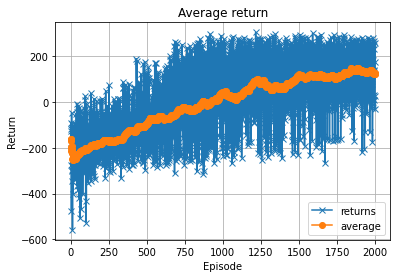

Finished training


In [4]:
import policy_gradients

policy_gradients.run({
    "algorithm": algorithm,
    "env_name": env,
    "n_episodes": 2000,
    "log_period": 100,
    "save_dir": save_dir,
    # "seed": seed, # Seed cannot be used on GPU: "scatter_add_cuda_kernel does not have a deterministic implementation"
})

## Download models

In [5]:
!zip -r ./models.zip ./models/actor_critic_LunarLander-v2
files.download('./models.zip')

  adding: models/actor_critic_LunarLander-v2/ (stored 0%)
  adding: models/actor_critic_LunarLander-v2/pi.zip (stored 0%)
  adding: models/actor_critic_LunarLander-v2/V.zip (stored 0%)
  adding: models/actor_critic_LunarLander-v2/network.zip (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>